In [4]:
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
from matplotlib.lines import Line2D


from utils.gmm_posterior import gmm_posterior
import matplotlib
#matplotlib.use('Agg')

## Binary (Banknote autentification)
### Noisy Natarajan matrix

In [20]:
df_list = []
folder_path = 'Results/banknote-authentication_Noisy_Natarajan'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_67692\1715628276.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\1715628276.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\1715628276.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.690975,Backward,0,0.2,Train
1,2,0.718323,Backward,0,0.2,Train
2,3,0.728350,Backward,0,0.2,Train
3,4,0.734731,Backward,0,0.2,Train
4,5,0.736554,Backward,0,0.2,Train
...,...,...,...,...,...,...
18195,96,0.956364,Supervised,0,0.2,Test
18196,97,0.956364,Supervised,0,0.2,Test
18197,98,0.956364,Supervised,0,0.2,Test
18198,99,0.956364,Supervised,0,0.2,Test


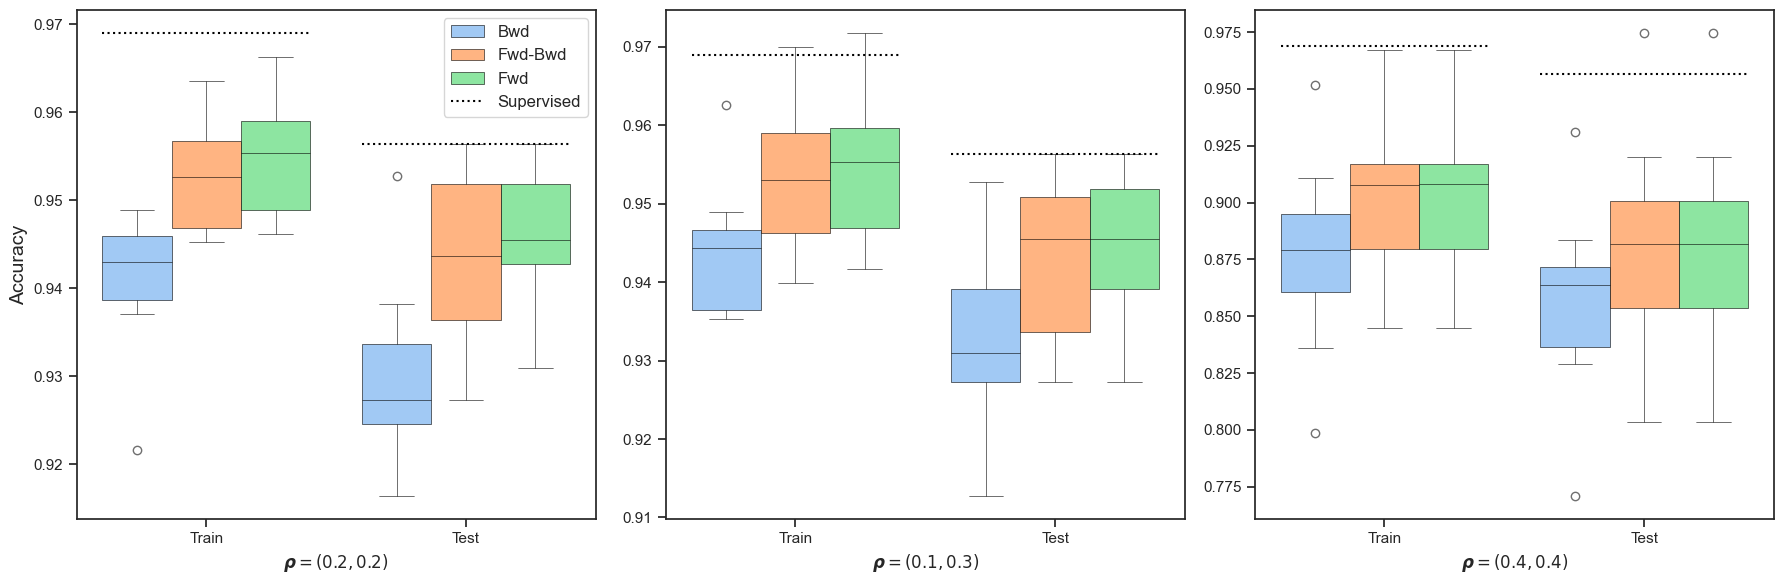

<Figure size 640x480 with 0 Axes>

In [21]:
selected_loss_fns = ['Backward', 'Forward','FB_decomposed']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 100]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.3]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.4]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==100) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==100) ].acc.mean()

train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5



sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward','FB_decomposed', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Bwd','Fwd-Bwd' ,'Fwd']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\boldsymbol{\rho}=(0.2,0.2)$')
axes[0].set_ylabel('Accuracy', fontsize=14)
axes[0].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[0].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)


handles, _ = axes[0].get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
axes[0].legend(all_handles, all_labels, prop={'size': 12})

#print(labels)

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\boldsymbol{\rho}=(0.1,0.3)$')
axes[1].set_ylabel('')
axes[1].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[1].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
axes[1].legend().remove()

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\boldsymbol{\rho}=(0.4,0.4)$')
axes[2].set_ylabel('')
axes[2].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[2].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
axes[2].legend().remove()

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('Fig2.eps', format='eps',dpi=1000)
#plt.savefig('Fig2.jpeg')

# MNIST
## Noisy

In [22]:
df_list = []
folder_path = 'Results/mnist_Noisy_Patrini_MNIST'
#folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_67692\3602214696.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\3602214696.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\3602214696.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.831933,Backward,0,0.2,Train
1,2,0.899317,Backward,0,0.2,Train
2,3,0.907783,Backward,0,0.2,Train
3,4,0.914933,Backward,0,0.2,Train
4,5,0.917650,Backward,0,0.2,Train
...,...,...,...,...,...,...
10195,46,0.978200,Supervised,0,0.8,Test
10196,47,0.978000,Supervised,0,0.8,Test
10197,48,0.977200,Supervised,0,0.8,Test
10198,49,0.978700,Supervised,0,0.8,Test


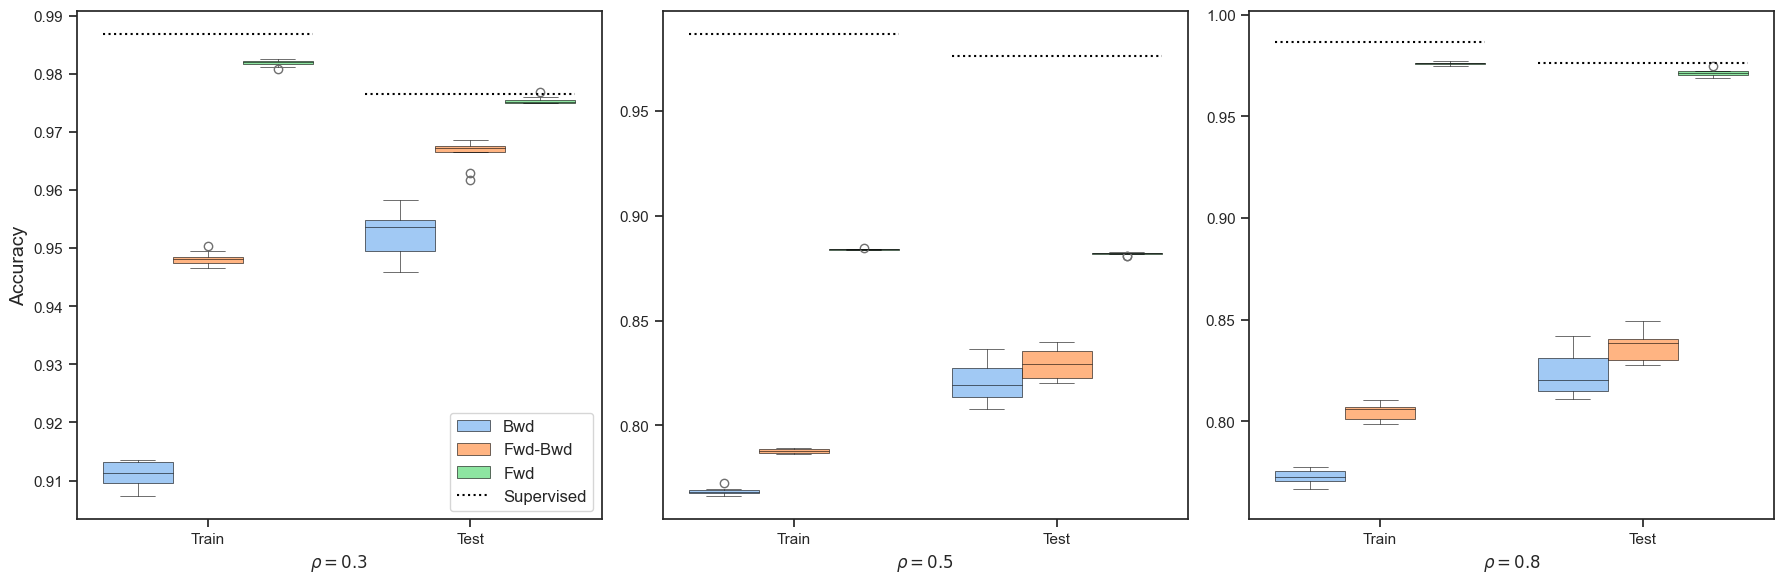

<Figure size 640x480 with 0 Axes>

In [26]:
selected_loss_fns = ['Backward', 'Forward','FB_decomposed']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==50) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ].acc.mean()

train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward','FB_decomposed', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Bwd','Fwd-Bwd', 'Fwd']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.3$')
axes[0].set_ylabel('Accuracy', fontsize=14)
axes[0].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[0].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)

handles, _ = axes[0].get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
axes[0].legend(all_handles, all_labels, prop={'size': 12})
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
axes[1].set_ylabel('')
axes[1].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[1].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
axes[1].legend().remove()

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
axes[2].set_ylabel('')
axes[2].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[2].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
axes[2].legend().remove()

all_vals = list(df_corr3['acc']) + [supervised_train, supervised_test]
y_min = min(all_vals)
y_max3 = max(all_vals)

padding = 0.015  # you can tweak this (5% of the range)
lower = y_min - padding
upper = y_max3 + padding

axes[2].set_ylim(lower, upper)
#axes[1].set_ylim(lower, upper)
#axes[0].set_ylim(lower, upper)



# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('Fig3.eps', format='eps',dpi=1000)
#plt.savefig('Fig3.jpeg')

# cCIFAR 10
## Noisy

In [27]:
df_list = []
folder_path = 'Results/Cifar10_Noisy_Patrini_CIFAR10'
#folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_67692\3476645127.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\3476645127.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\3476645127.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.34196,Backward,0,0.2,Train
1,2,0.51554,Backward,0,0.2,Train
2,3,0.61810,Backward,0,0.2,Train
3,4,0.68462,Backward,0,0.2,Train
4,5,0.71314,Backward,0,0.2,Train
...,...,...,...,...,...,...
5495,46,0.85160,Supervised,4,0.5,Test
5496,47,0.85180,Supervised,4,0.5,Test
5497,48,0.85200,Supervised,4,0.5,Test
5498,49,0.85180,Supervised,4,0.5,Test


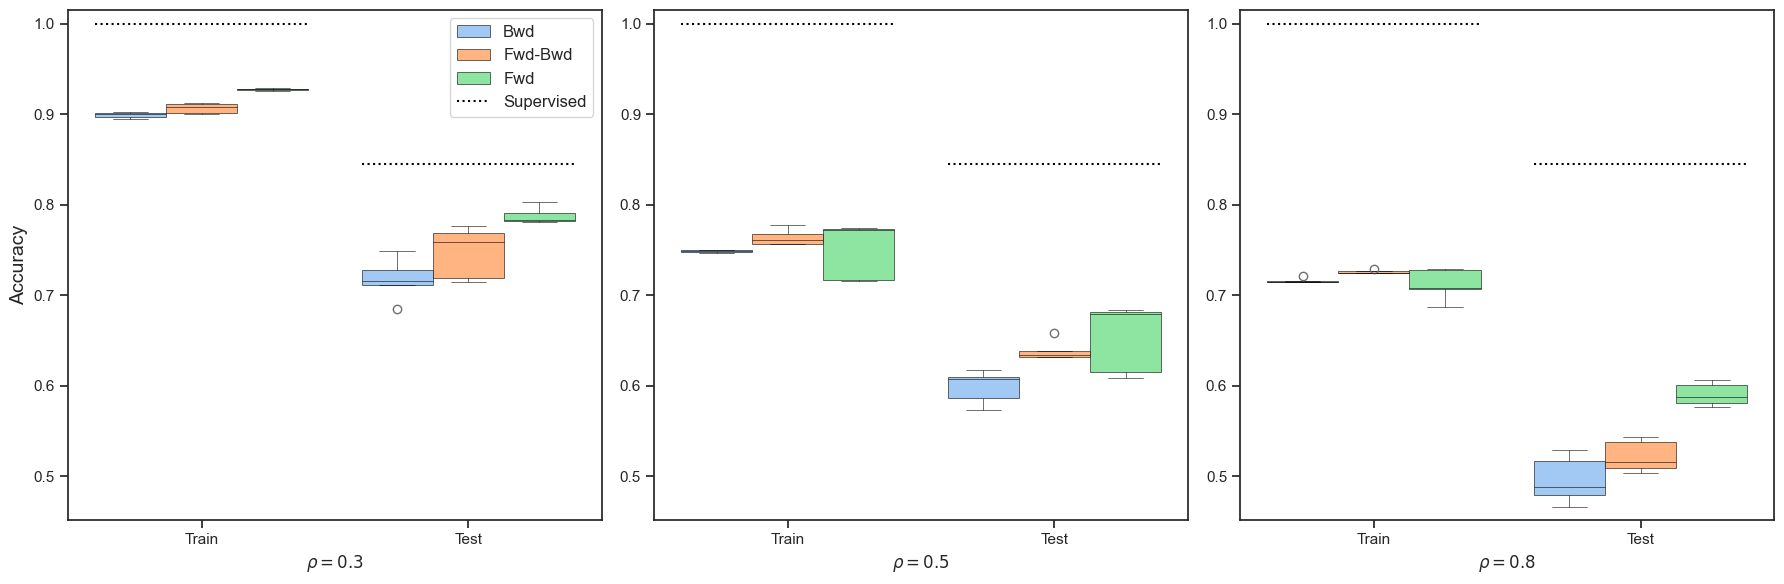

<Figure size 640x480 with 0 Axes>

In [ ]:
selected_loss_fns = ['Backward', 'Forward','FB_decomposed']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==50) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ].acc.mean()

train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward','FB_decomposed', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Bwd','Fwd-Bwd', 'Fwd']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.3$')
axes[0].set_ylabel('Accuracy', fontsize=14)
axes[0].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[0].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)

handles, _ = axes[0].get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
axes[0].legend(all_handles, all_labels, prop={'size': 12})
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
axes[1].set_ylabel('')
axes[1].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[1].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
axes[1].legend().remove()

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
axes[2].set_ylabel('')
axes[2].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[2].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
axes[2].legend().remove()

all_vals = list(df_corr3['acc']) + [supervised_train, supervised_test]
y_min = min(all_vals)
y_max = max(all_vals)

padding = 0.015  # you can tweak this (5% of the range)
lower = y_min - padding
upper = y_max + padding

axes[2].set_ylim(lower, upper)
axes[1].set_ylim(lower, upper)
axes[0].set_ylim(lower, upper)



# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('Fig4.eps', format='eps',dpi=1000)
#plt.savefig('Fig3.jpeg')

# CIFAR 100
## Noisy

In [29]:
df_list = []
folder_path = 'Results/Cifar100_Noisy_CIFAR100'
#folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_67692\2977633178.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\2977633178.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\2977633178.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.05630,Backward,0,0.2,Train
1,2,0.07184,Backward,0,0.2,Train
2,3,0.07816,Backward,0,0.2,Train
3,4,0.08452,Backward,0,0.2,Train
4,5,0.10122,Backward,0,0.2,Train
...,...,...,...,...,...,...
4995,46,0.34780,Supervised,4,0.2,Test
4996,47,0.34810,Supervised,4,0.2,Test
4997,48,0.34010,Supervised,4,0.2,Test
4998,49,0.33650,Supervised,4,0.2,Test


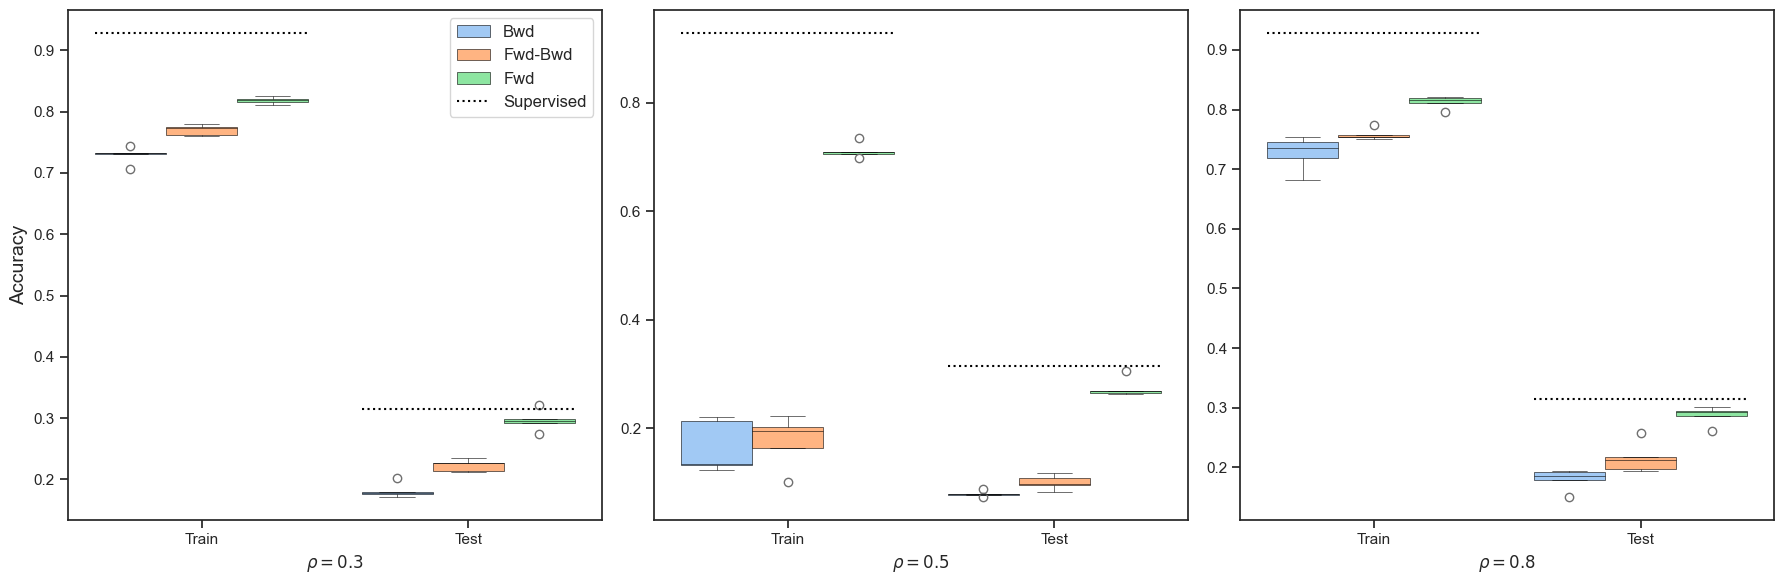

<Figure size 640x480 with 0 Axes>

In [30]:
selected_loss_fns = ['Backward', 'Forward','FB_decomposed']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==50) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ].acc.mean()

train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward','FB_decomposed', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Bwd','Fwd-Bwd', 'Fwd']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.3$')
axes[0].set_ylabel('Accuracy', fontsize=14)
axes[0].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[0].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)

handles, _ = axes[0].get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
axes[0].legend(all_handles, all_labels, prop={'size': 12})
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
axes[1].set_ylabel('')
axes[1].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[1].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
axes[1].legend().remove()

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
axes[2].set_ylabel('')
axes[2].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[2].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
axes[2].legend().remove()
'''
all_vals = list(df_corr3['acc']) + [supervised_train, supervised_test]
y_min = min(all_vals)
y_max = max(all_vals)

padding = 0.015  # you can tweak this (5% of the range)
lower = y_min - padding
upper = y_max + padding

axes[2].set_ylim(lower, upper)
axes[1].set_ylim(lower, upper)
axes[0].set_ylim(lower, upper)
'''


# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('Fig5.eps', format='eps',dpi=1000)
#plt.savefig('Fig3.jpeg')

# GMM
## Noisy

In [31]:
df_list = []
folder_path = 'Results/gmm_unif_noise'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_67692\4037277151.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\4037277151.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\4037277151.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.783125,Backward,0,0.2,Train
1,2,0.791875,Backward,0,0.2,Train
2,3,0.793125,Backward,0,0.2,Train
3,4,0.793125,Backward,0,0.2,Train
4,5,0.794063,Backward,0,0.2,Train
...,...,...,...,...,...,...
12195,96,0.890000,Supervised,0,0.2,Test
12196,97,0.890000,Supervised,0,0.2,Test
12197,98,0.890000,Supervised,0,0.2,Test
12198,99,0.890000,Supervised,0,0.2,Test


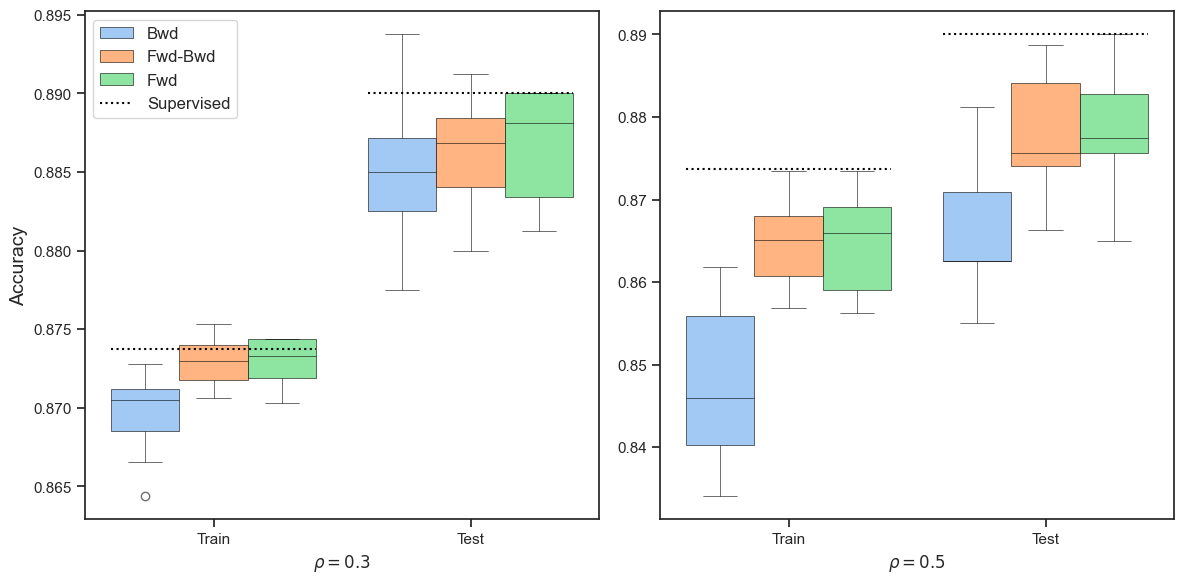

<Figure size 640x480 with 0 Axes>

In [ ]:
selected_loss_fns = ['Backward', 'Forward','FB_decomposed']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 100]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
#df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==100) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==100) ].acc.mean()

train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)


hue_order = ['Backward','FB_decomposed', 'Forward']#'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Bwd','Fwd-Bwd', 'Fwd']#'Convex Backward ', r'Backward (${\bf B}^\ast$)', r'Convex Backward (${\bf B}^\ast$)', , r'ForwardBackward (${\bf F=I},{\bf B=B^\ast}$)']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.3$')
axes[0].set_ylabel('Accuracy', fontsize=14)
axes[0].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[0].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)

handles, _ = axes[0].get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
axes[0].legend(all_handles, all_labels, prop={'size': 12})
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
axes[1].set_ylabel('')
axes[1].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[1].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
axes[1].legend().remove()


'''
all_vals = list(df_corr1['acc'])  + [supervised_train, supervised_test]
y_min = min(all_vals)
y_max = max(all_vals)

padding = 0.015  # you can tweak this (5% of the range)
lower = y_min - padding
upper = y_max + padding
axes[0].set_ylim(lower, upper)


all_vals = list(df_corr2['acc']) + [supervised_train, supervised_test]
y_min = min(all_vals)
y_max = max(all_vals)

padding = 0.015  # you can tweak this (5% of the range)
lower = y_min - padding
upper = y_max + padding
#axes[2].set_ylim(lower, upper)
axes[1].set_ylim(lower, upper)

'''

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('Fig6.eps', format='eps',dpi=1000)
#plt.savefig('Fig3.jpeg')

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_unif_noise"
corr = [0.2,0.5] 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward','FB_decomposed','Forward']
results = []
for cor in corr:
    for los in losses:
        for rep in range(10):
            model_file = folder + f"/{los}_p_+{cor}p_-None_{rep}.pkl"
            with open(model_file, "rb") as f:
                model = pickle.load(f)
                f.close()
            model = model['overall_models']

            data_folder = f"Datasets/weak_datasets/gmm_unif_noise_p{cor}"
            data_file = data_folder +  f"/Dataset_{rep}.pkl"
            f = open(data_file,"rb")
            Data,Weak = pickle.load(f)
            data = Data.test_dataset.data.to(device)

            
            yhat = soft(model(data)).cpu().detach().numpy()
            POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
            AB = POS-yhat
            norms = np.diag(AB@AB.T)

            mean_norm = np.mean(norms)
            std_norm = np.std(norms)
            
            # Store values in the results list
            results.append({
                'Corruption':cor,
                "Loss Function": los,
                "Repetition": rep,
                "Mean norm": mean_norm,
                "Std norm": std_norm
            })
df_results = pd.DataFrame(results)
df_results

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.013888,0.047937
1,0.2,Backward,1,0.017460,0.059702
2,0.2,Backward,2,0.017767,0.066326
3,0.2,Backward,3,0.016377,0.057483
4,0.2,Backward,4,0.018942,0.040408
5,0.2,Backward,5,0.013535,0.050091
6,0.2,Backward,6,0.017913,0.061920
7,0.2,Backward,7,0.012627,0.048219
8,0.2,Backward,8,0.019509,0.043184
9,0.2,Backward,9,0.015153,0.051169


['Backward', 'FB_decomposed', 'Forward']


C:\Users\danib\AppData\Local\Temp\ipykernel_67692\991419879.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5'])
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\991419879.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5'])


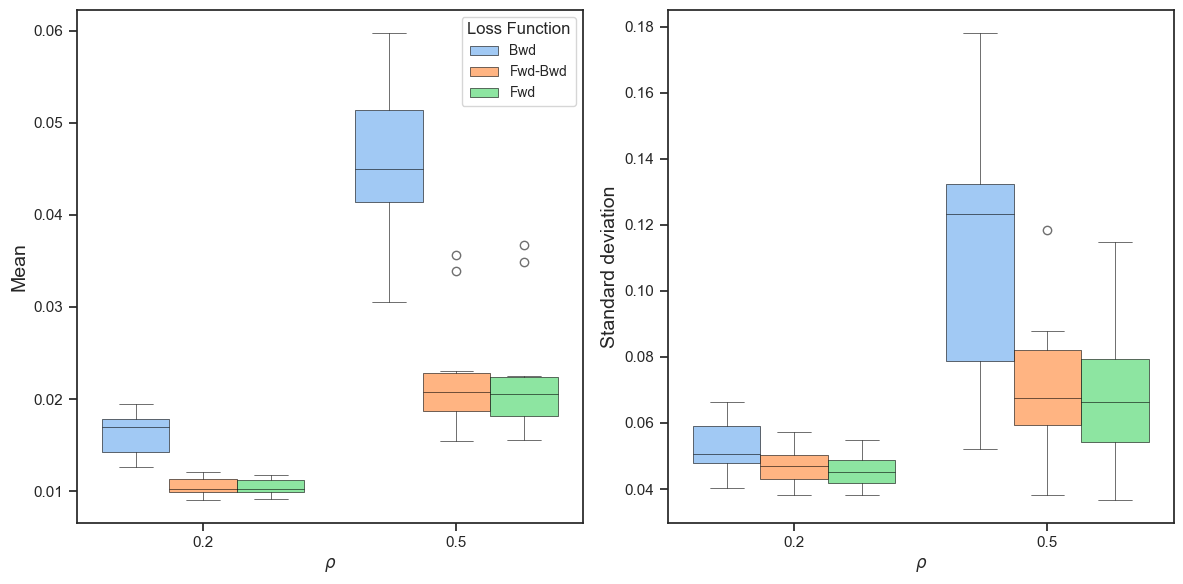

<Figure size 640x480 with 0 Axes>

In [34]:
selected_loss_fns = ['Backward', 'FB_decomposed', 'Forward']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      # Box border
            whiskerprops=dict(color='black', linewidth=0.4),      # Whisker lines
            capprops=dict(color='black', linewidth=0.4),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.4))
#axes[0].set_title('Mean')
axes[0].set_ylabel('Mean', fontsize=14)

axes[0].set_xticklabels(['0.2','0.5'])
axes[0].set_xlabel(r'$\rho$')
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
#['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']
new_labels = ['Bwd', 'Fwd-Bwd','Fwd']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 10})

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      # Box border
            whiskerprops=dict(color='black', linewidth=0.4),      # Whisker lines
            capprops=dict(color='black', linewidth=0.4),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.4))
#axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Standard deviation', fontsize=14)
#axes[0].set_ylabel('Train Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].set_xticklabels(['0.2','0.5'])
axes[1].set_xlabel(r'$\rho$')
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('Fig7.eps', format='eps',dpi=1000)
#plt.savefig('Fig7.jpeg')

# MNIST
## Complementary


In [37]:
df_list = []
folder_path = 'Results/mnist_Complementary'
#folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_67692\759293591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\759293591.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\759293591.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.533383,Backward,0,0.2,Train
1,2,0.713483,Backward,0,0.2,Train
2,3,0.724033,Backward,0,0.2,Train
3,4,0.708333,Backward,0,0.2,Train
4,5,0.693883,Backward,0,0.2,Train
...,...,...,...,...,...,...
3095,46,0.978200,Supervised,0,0.2,Test
3096,47,0.978000,Supervised,0,0.2,Test
3097,48,0.977200,Supervised,0,0.2,Test
3098,49,0.978700,Supervised,0,0.2,Test


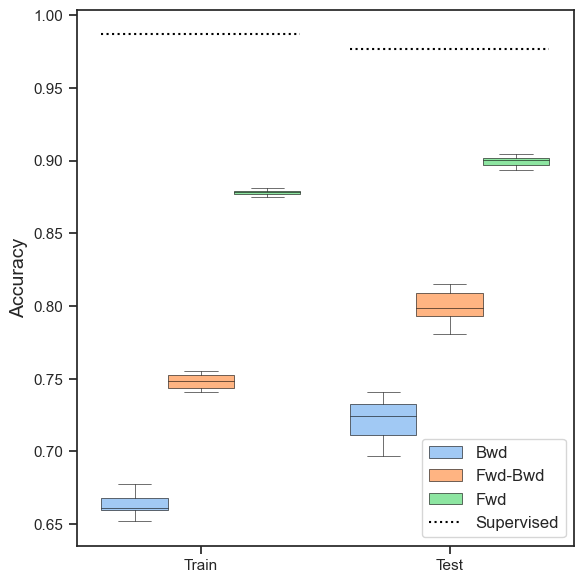

<Figure size 640x480 with 0 Axes>

In [39]:
selected_loss_fns = ['Backward', 'FB_decomposed','Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 7]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p'] == 0.2]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==50) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ].acc.mean()

train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5

sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(6, 6))  # Use `ax` instead of `axes` and remove sharey

hue_order = ['Backward', 'FB_decomposed', 'Forward']
new_labels = ['Bwd','Fwd-Bwd', 'Fwd']

sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order=hue_order, saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
ax.axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
ax.axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
# Set labels
#ax.set_xlabel(r'$\rho=0.3$')

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel(r'')

# Modify the legend with new labels
handles, _ = ax.get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
ax.legend(all_handles, all_labels, prop={'size': 12})

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
plt.savefig('Fig8-1.eps', format='eps',dpi=1000)
#plt.savefig('Fig8.jpeg')

# CIFAR10
## Complementary

In [40]:
df_list = []
folder_path = 'Results/Cifar10_Complementary'
#folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_67692\714098529.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\714098529.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\714098529.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.10726,Backward,0,0.2,Train
1,2,0.11202,Backward,0,0.2,Train
2,3,0.10658,Backward,0,0.2,Train
3,4,0.10366,Backward,0,0.2,Train
4,5,0.10074,Backward,0,0.2,Train
...,...,...,...,...,...,...
1995,46,0.85140,Supervised,4,0.2,Test
1996,47,0.85140,Supervised,4,0.2,Test
1997,48,0.85110,Supervised,4,0.2,Test
1998,49,0.85090,Supervised,4,0.2,Test


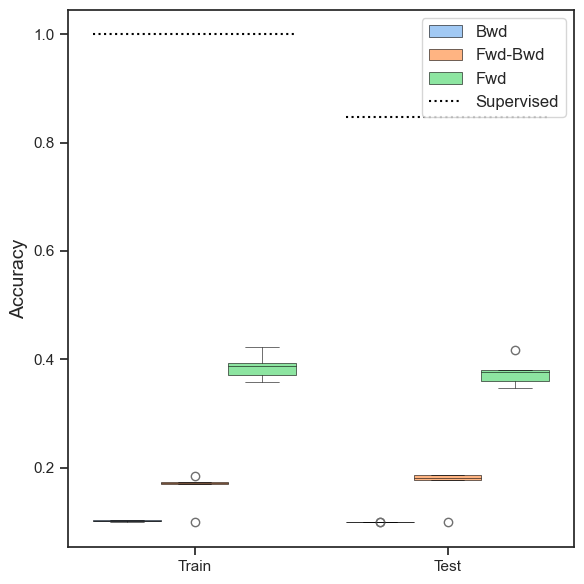

<Figure size 640x480 with 0 Axes>

In [41]:
selected_loss_fns = ['Backward', 'FB_decomposed','Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p'] == 0.2]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==50) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ].acc.mean()

train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5

sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(6, 6))  # Use `ax` instead of `axes` and remove sharey

hue_order = ['Backward', 'FB_decomposed', 'Forward']
new_labels = ['Bwd','Fwd-Bwd', 'Fwd']

sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order=hue_order, saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
ax.axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
ax.axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
# Set labels
#ax.set_xlabel(r'$\rho=0.3$')

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel(r'')

# Modify the legend with new labels
handles, _ = ax.get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
ax.legend(all_handles, all_labels, prop={'size': 12})

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
plt.savefig('Fig9-1.eps', format='eps',dpi=1000)
#plt.savefig('Fig8.jpeg')

# CIFAR 100
## Complementary

In [42]:

df_list = []
folder_path = 'Results/Cifar100_Complementary'
#folder_path = 'Results/Old/mnist_Noisy_Patrini_MNIST'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_67692\2725917655.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\2725917655.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\2725917655.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.05064,Backward,0,0.2,Train
1,2,0.05030,Backward,0,0.2,Train
2,3,0.05118,Backward,0,0.2,Train
3,4,0.05004,Backward,0,0.2,Train
4,5,0.05102,Backward,0,0.2,Train
...,...,...,...,...,...,...
1995,46,0.40100,Supervised,4,0.2,Test
1996,47,0.40310,Supervised,4,0.2,Test
1997,48,0.40700,Supervised,4,0.2,Test
1998,49,0.40130,Supervised,4,0.2,Test


C:\Users\danib\AppData\Local\Temp\ipykernel_67692\3846242847.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


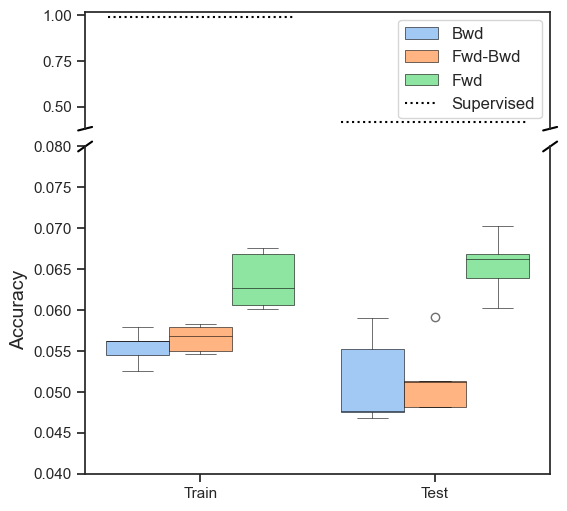

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

selected_loss_fns = ['Backward', 'FB_decomposed','Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p'] == 0.2]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==50) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ].acc.mean()

train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


hue_order = ['Backward', 'FB_decomposed', 'Forward']
new_labels = ['Bwd','Fwd-Bwd', 'Fwd']

# ——————————————
# (Assume df_corr1, supervised_train, supervised_test,
#  train_xmin, train_xmax, test_xmin, test_xmax,
#  hue_order, new_labels are defined exactly as before.)
# ——————————————

sns.set_theme(style="ticks", palette="pastel")

# 1) Create two subplots (stacked), sharing the x‐axis.
fig, (ax_top, ax_bottom) = plt.subplots(
    2,
    1,
    sharex=True,
    figsize=(6, 6),
    gridspec_kw={'height_ratios': [1, 2.8], 'hspace': 0.08}
)

# 2) Set the y‐limits to match your figure:
bottom_ylim = (0.04, 0.08)   # The cluster of boxplots lives here
top_ylim    = (0.38, 1.02)   # The “Supervised” dotted lines live here

ax_bottom.set_ylim(bottom_ylim)
ax_top   .set_ylim(top_ylim)

# 3) Draw the same boxplot on both axes:
sns.boxplot(
    data=df_corr1,
    x='train',
    y='acc',
    hue='loss_fn',
    hue_order=hue_order,
    saturation=1,
    boxprops=dict(edgecolor='black', linewidth=0.4),
    whiskerprops=dict(color='black', linewidth=0.4),
    capprops=dict(color='black', linewidth=0.4),
    medianprops=dict(color='black', linewidth=0.4),
    ax=ax_top
)
sns.boxplot(
    data=df_corr1,
    x='train',
    y='acc',
    hue='loss_fn',
    hue_order=hue_order,
    saturation=1,
    boxprops=dict(edgecolor='black', linewidth=0.4),
    whiskerprops=dict(color='black', linewidth=0.4),
    capprops=dict(color='black', linewidth=0.4),
    medianprops=dict(color='black', linewidth=0.4),
    ax=ax_bottom
)

# 4) Plot the “Supervised” baselines (Train & Test) on both subplots:
for ax in (ax_top, ax_bottom):
    ax.axhline(
        y=supervised_train,
        color='black',
        linestyle=':',
        linewidth=1.5,
        xmin=train_xmin,
        xmax=train_xmax
    )
    ax.axhline(
        y=supervised_test,
        color='black',
        linestyle=':',
        linewidth=1.5,
        xmin=test_xmin,
        xmax=test_xmax
    )

# 5) Hide the spines/ticks between the two axes, so it looks like one broken axis:
ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)
ax_top.tick_params(labelbottom=False)  # only the bottom plot shows x‐tick labels

ax_bottom.tick_params(axis='x', which='both', top=False)
ax_top.tick_params(axis='x', which='both', bottom=False)

# 6) Draw small diagonal “break” markers at the gap:
d = .015  # length of diagonal lines in axes‐coordinates
# Bottom of ax_top (so its lower border shows a little slash)
kwargs = dict(transform=ax_top.transAxes, color='black', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)

# Top of ax_bottom (so its upper border shows a slash)
kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# 7) Labels: only the bottom subplot needs the y‐label and x‐label:
ax_bottom.set_xlabel('', fontsize=14)   # or put your desired x‐label here
ax_bottom.set_ylabel('Accuracy', fontsize=14)
ax_top.set_ylabel('')  # no y‐label on the top subplot

# 8) Single legend (pull from bottom axis, then append “Supervised” handle):
handles, labels = ax_bottom.get_legend_handles_labels()
supervised_handle = Line2D(
    [0], [0],
    color='black',
    linestyle=':',
    linewidth=1.5,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels  = new_labels + ['Supervised']
ax_top.legend(all_handles, all_labels, prop={'size': 12}, loc='upper right')
ax_bottom.legend().remove()  # remove legend from bottom axis

# 9) Finalize and save:
plt.tight_layout()
plt.savefig('Fig8_broken_axis.eps', format='eps', dpi=1000)
plt.show()


## GMM 
### Complementary

In [44]:
df_list = []
folder_path = 'Results/gmm_Complementary'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_67692\414220636.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\414220636.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\414220636.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.787500,Backward,0,0.2,Train
1,2,0.791875,Backward,0,0.2,Train
2,3,0.792188,Backward,0,0.2,Train
3,4,0.792500,Backward,0,0.2,Train
4,5,0.792813,Backward,0,0.2,Train
...,...,...,...,...,...,...
3995,46,0.885000,Supervised,9,0.2,Test
3996,47,0.886250,Supervised,9,0.2,Test
3997,48,0.886250,Supervised,9,0.2,Test
3998,49,0.886250,Supervised,9,0.2,Test


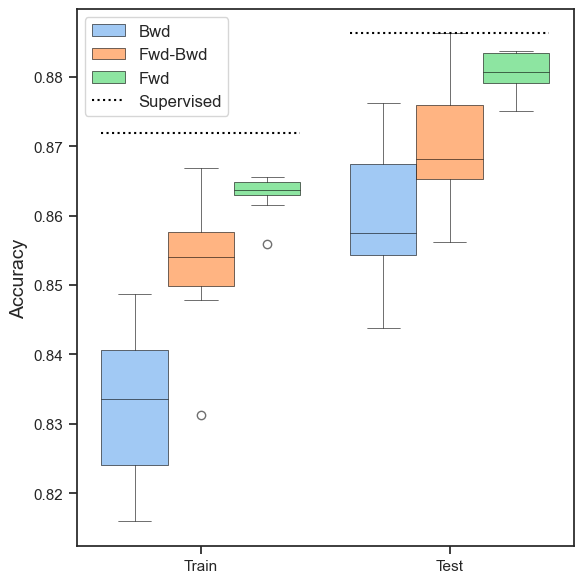

<Figure size 640x480 with 0 Axes>

In [ ]:
selected_loss_fns = ['Backward', 'FB_decomposed','Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p'] == 0.2]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==50) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ].acc.mean()

train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5

sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(6, 6))  # Use `ax` instead of `axes` and remove sharey

hue_order = ['Backward', 'FB_decomposed', 'Forward']
new_labels = ['Bwd','Fwd-Bwd', 'Fwd']

sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order=hue_order, saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
ax.axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
ax.axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
# Set labels
#ax.set_xlabel(r'$\rho=0.3$')

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel(r'')

# Modify the legend with new labels
handles, _ = ax.get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
ax.legend(all_handles, all_labels, prop={'size': 12})

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
plt.savefig('Fig9.eps', format='eps',dpi=1000)
#plt.savefig('Fig8.jpeg')

In [46]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_Complementary"
corr = 0.2 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward','FB_decomposed','Forward']
results = []
for los in losses:
    for rep in range(10):
        model_file = folder + f"/{los}_p_+{corr}p_-None_{rep}.pkl"
        with open(model_file, "rb") as f:
            model = pickle.load(f)
            f.close()
        model = model['overall_models']

        data_folder = f"Datasets/weak_datasets/gmm_Complementary_p{corr}"
        data_file = data_folder +  f"/Dataset_{rep}.pkl"
        f = open(data_file,"rb")
        Data,Weak = pickle.load(f)
        data = Data.test_dataset.data.to(device)

        
        yhat = soft(model(data)).cpu().detach().numpy()
        POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
        AB = POS-yhat
        norms = np.diag(AB@AB.T)

        mean_norm = np.mean(norms)
        std_norm = np.std(norms)
        
        # Store values in the results list
        results.append({
            'Corruption':corr,
            "Loss Function": los,
            "Repetition": rep,
            "Mean norm": mean_norm,
            "Std norm": std_norm
        })
df_results = pd.DataFrame(results)
df_results

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.046095,0.092791
1,0.2,Backward,1,0.045434,0.145107
2,0.2,Backward,2,0.054016,0.129589
3,0.2,Backward,3,0.039681,0.128054
4,0.2,Backward,4,0.047883,0.136684
5,0.2,Backward,5,0.054070,0.147459
6,0.2,Backward,6,0.053048,0.120382
7,0.2,Backward,7,0.055059,0.136671
8,0.2,Backward,8,0.059633,0.134100
9,0.2,Backward,9,0.047018,0.100276


['Backward', 'FB_decomposed', 'Forward']


C:\Users\danib\AppData\Local\Temp\ipykernel_67692\1543976593.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([' '])
C:\Users\danib\AppData\Local\Temp\ipykernel_67692\1543976593.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([' '])


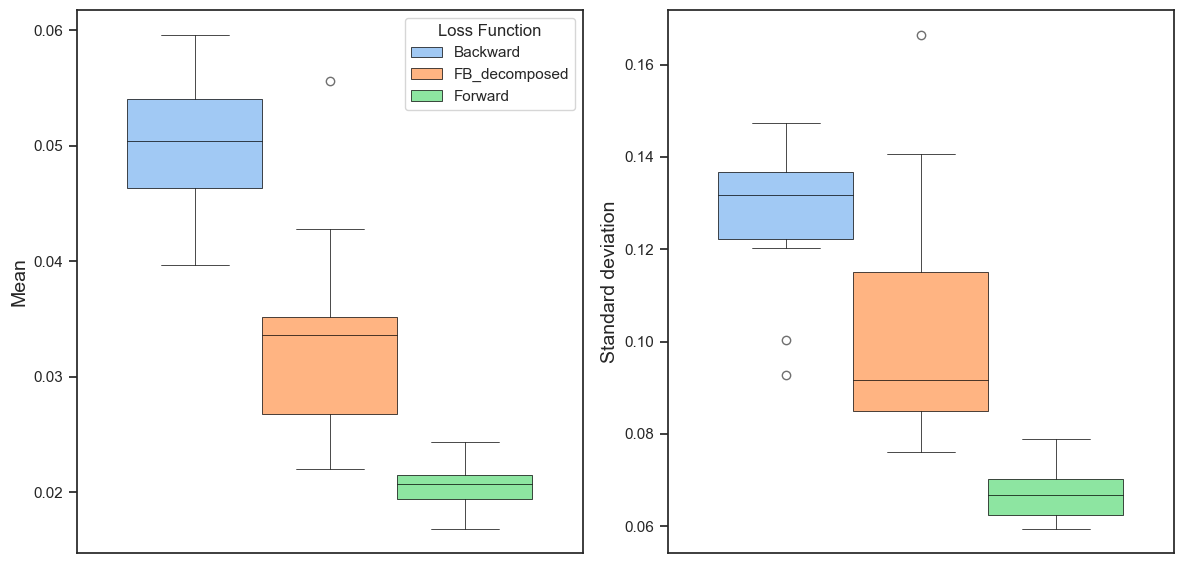

<Figure size 640x480 with 0 Axes>

In [47]:
selected_loss_fns = ['Backward', 'FB_decomposed','Forward']
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[0].set_title('Mean')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Mean', fontsize=14)
axes[0].set_xticklabels([' '])
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
new_labels = ['Bwd', 'Fwd-Bwd','Fwd']
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.5),      # Box border
            whiskerprops=dict(color='black', linewidth=0.5),      # Whisker lines
            capprops=dict(color='black', linewidth=0.5),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.5))
#axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Standard deviation', fontsize=14)
axes[1].set_xlabel(' ')
#axes[0].set_ylabel('Train Accuracy')
axes[1].set_xticklabels([' '])
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('Fig10.eps', format='eps',dpi=1000)
#plt.savefig('Fig12.jpeg')

# MNIST
## Partial

In [25]:

import os
import glob
import pandas as pd

# 1) Build a glob pattern that matches all FB_decomposed CSVs under Results/mnist_Partial
#    On Windows this will use backslashes automatically via os.path.join.
pattern = os.path.join("Results", "mnist_Partial", "FB_decomposed_p_*_*.csv")

# 2) Iterate over each matching filepath
for filepath in glob.glob(pattern):
    # Extract just the filename (not the full path)
    filename = os.path.basename(filepath)
    
    # 3) Pull out the substring after "p_-" and before the next underscore.
    #    In "FB_decomposed_p_+0.8p_-2.0_4.csv" → split on "p_-" gives ["FB_decomposed_p_+0.8p_", "2.0_4.csv"]
    #    Then split that on "_" to isolate "2.0".
    try:
        raw_val = filename.split("p_-")[1].split("_")[0]  # e.g. "2.0"
    except IndexError:
        # If the filename doesn't match the expected pattern, skip it.
        continue
    
    # 4) Convert "2.0" → float → int → "2"
    val_int = int(float(raw_val))
    
    # 5) Form the new loss_fn string
    new_loss_name = f"FB_decomposed_{val_int}"
    
    # 6) Load the CSV, replace any "FB_decomposed" entries in loss_fn, and write back
    df = pd.read_csv(filepath)
    df.loc[df["loss_fn"] == "FB_decomposed", "loss_fn"] = new_loss_name
    df.to_csv(filepath, index=False)
    
    print(f"Updated {filename}: set loss_fn → {new_loss_name}")
    

Updated FB_decomposed_p_+0.2p_-2.0_0.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_1.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_2.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_3.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_4.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_5.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_6.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_7.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_8.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_9.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-5.0_0.csv: set loss_fn → FB_decomposed_5
Updated FB_decomposed_p_+0.2p_-5.0_1.csv: set loss_fn → FB_decomposed_5
Updated FB_decomposed_p_+0.2p_-5.0_2.csv: set loss_fn → FB_decomposed_5
Updated FB_decomposed_p_+0.2p_-5.0_3.csv: set loss_fn → FB_decom

In [26]:
df_list = []
folder_path = 'Results/mnist_Partial'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_24848\212249580.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_24848\212249580.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_24848\212249580.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.76300,Backward_conv,0,0.2,Train
1,2,0.85945,Backward_conv,0,0.2,Train
2,3,0.86805,Backward_conv,0,0.2,Train
3,4,0.87030,Backward_conv,0,0.2,Train
4,5,0.87005,Backward_conv,0,0.2,Train
...,...,...,...,...,...,...
18095,46,0.97820,Supervised,0,0.2,Test
18096,47,0.97800,Supervised,0,0.2,Test
18097,48,0.97720,Supervised,0,0.2,Test
18098,49,0.97870,Supervised,0,0.2,Test


0.9868833333333332 0.9765


C:\Users\danib\AppData\Local\Temp\ipykernel_24848\2971093033.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend().remove()


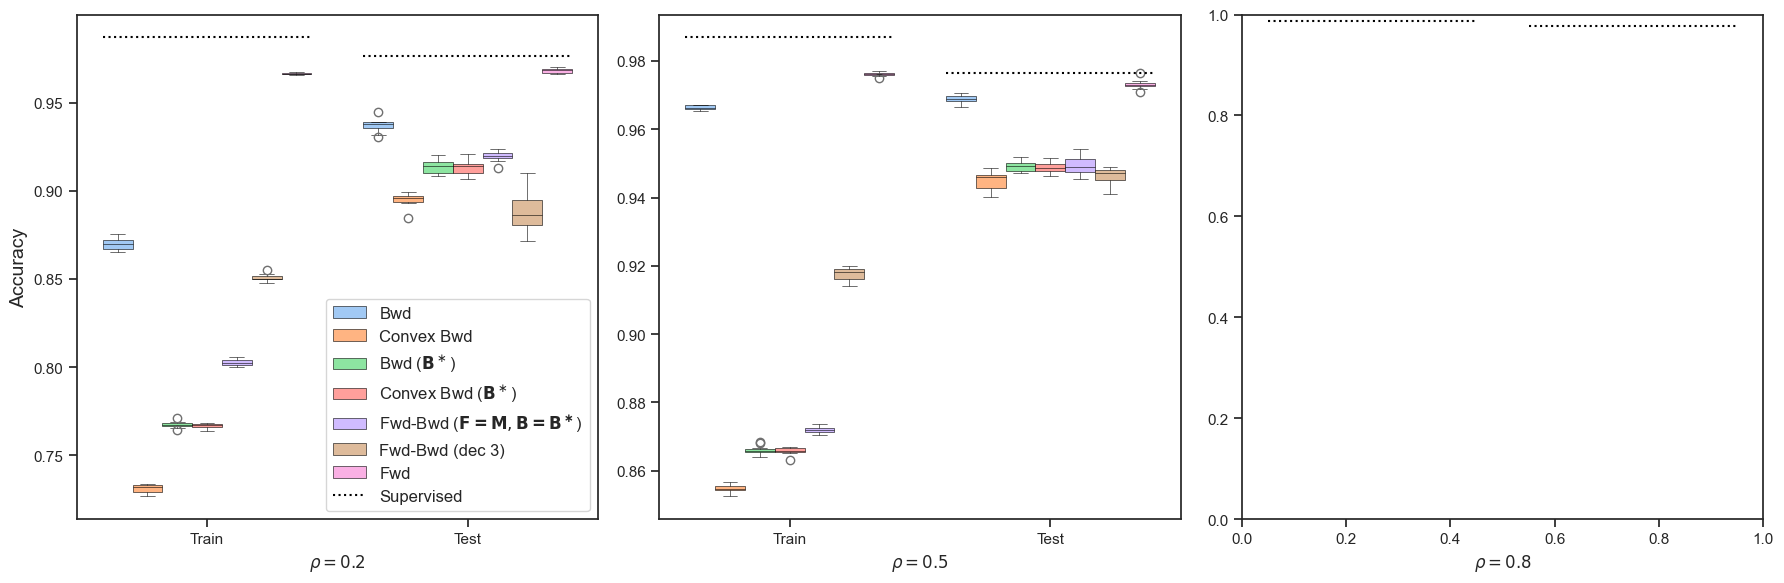

In [28]:
#selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
#last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==50) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ].acc.mean()

print(supervised_train, supervised_test)
train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 
             'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 
             'Forward_opt',
             #'FB_decomposed_2','FB_decomposed_5',
             'FB_decomposed_8','Forward']
new_labels = ['Bwd', 
              'Convex Bwd ', r'Bwd (${\bf B}^\ast$)', r'Convex Bwd (${\bf B}^\ast$)',
                  r'Fwd-Bwd (${\bf F=M},{\bf B=B^\ast}$)',
                  #'Fwd-Bwd (dec 1)','Fwd-Bwd (dec 2)',
                  'Fwd-Bwd (dec 3)','Fwd']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.2$')
axes[0].set_ylabel('Accuracy', fontsize=14)
#axes[0].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)
axes[0].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[0].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)


handles, _ = axes[0].get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
axes[0].legend(all_handles, all_labels, prop={'size': 12})


#handles, labels = axes[0].get_legend_handles_labels()
#axes[0].legend(handles, new_labels,prop={'size': 12})
#print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
axes[1].set_ylabel('')
axes[1].legend().remove()
axes[1].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[1].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
#axes[1].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
axes[2].set_ylabel('')
axes[2].legend().remove()
axes[2].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[2].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
#axes[2].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig13.eps', format='eps',dpi=1000)
#plt.savefig('Fig13.jpeg')

# CIFAR 10
## Partial

In [21]:
# TO DO ONLY ONCE
import os
import glob
import pandas as pd

# 1) Build a glob pattern that matches all FB_decomposed CSVs under Results/Cifar10_Partial
#    On Windows this will use backslashes automatically via os.path.join.
pattern = os.path.join("Results", "Cifar10_Partial", "FB_decomposed_p_*_*.csv")

# 2) Iterate over each matching filepath
for filepath in glob.glob(pattern):
    # Extract just the filename (not the full path)
    filename = os.path.basename(filepath)
    
    # 3) Pull out the substring after "p_-" and before the next underscore.
    #    In "FB_decomposed_p_+0.8p_-2.0_4.csv" → split on "p_-" gives ["FB_decomposed_p_+0.8p_", "2.0_4.csv"]
    #    Then split that on "_" to isolate "2.0".
    try:
        raw_val = filename.split("p_-")[1].split("_")[0]  # e.g. "2.0"
    except IndexError:
        # If the filename doesn't match the expected pattern, skip it.
        continue
    
    # 4) Convert "2.0" → float → int → "2"
    val_int = int(float(raw_val))
    
    # 5) Form the new loss_fn string
    new_loss_name = f"FB_decomposed_{val_int}"
    
    # 6) Load the CSV, replace any "FB_decomposed" entries in loss_fn, and write back
    df = pd.read_csv(filepath)
    df.loc[df["loss_fn"] == "FB_decomposed", "loss_fn"] = new_loss_name
    df.to_csv(filepath, index=False)
    
    print(f"Updated {filename}: set loss_fn → {new_loss_name}")

Updated FB_decomposed_p_+0.2p_-2.0_0.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_1.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_2.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_3.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_4.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-5.0_0.csv: set loss_fn → FB_decomposed_5
Updated FB_decomposed_p_+0.2p_-5.0_1.csv: set loss_fn → FB_decomposed_5
Updated FB_decomposed_p_+0.2p_-5.0_2.csv: set loss_fn → FB_decomposed_5
Updated FB_decomposed_p_+0.2p_-5.0_3.csv: set loss_fn → FB_decomposed_5
Updated FB_decomposed_p_+0.2p_-5.0_4.csv: set loss_fn → FB_decomposed_5
Updated FB_decomposed_p_+0.2p_-5.0_5.csv: set loss_fn → FB_decomposed_5
Updated FB_decomposed_p_+0.2p_-8.0_0.csv: set loss_fn → FB_decomposed_8
Updated FB_decomposed_p_+0.2p_-8.0_1.csv: set loss_fn → FB_decomposed_8
Updated FB_decomposed_p_+0.2p_-8.0_2.csv: set loss_fn → FB_decom

In [22]:
df_list = []
folder_path = 'Results/Cifar10_Partial'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_24848\3332450277.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_24848\3332450277.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_24848\3332450277.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.16816,Backward_conv,0,0.2,Train
1,2,0.22750,Backward_conv,0,0.2,Train
2,3,0.30734,Backward_conv,0,0.2,Train
3,4,0.35226,Backward_conv,0,0.2,Train
4,5,0.38328,Backward_conv,0,0.2,Train
...,...,...,...,...,...,...
16195,46,0.84290,Supervised,0,0.2,Test
16196,47,0.84290,Supervised,0,0.2,Test
16197,48,0.84280,Supervised,0,0.2,Test
16198,49,0.84260,Supervised,0,0.2,Test


1.0 0.8427


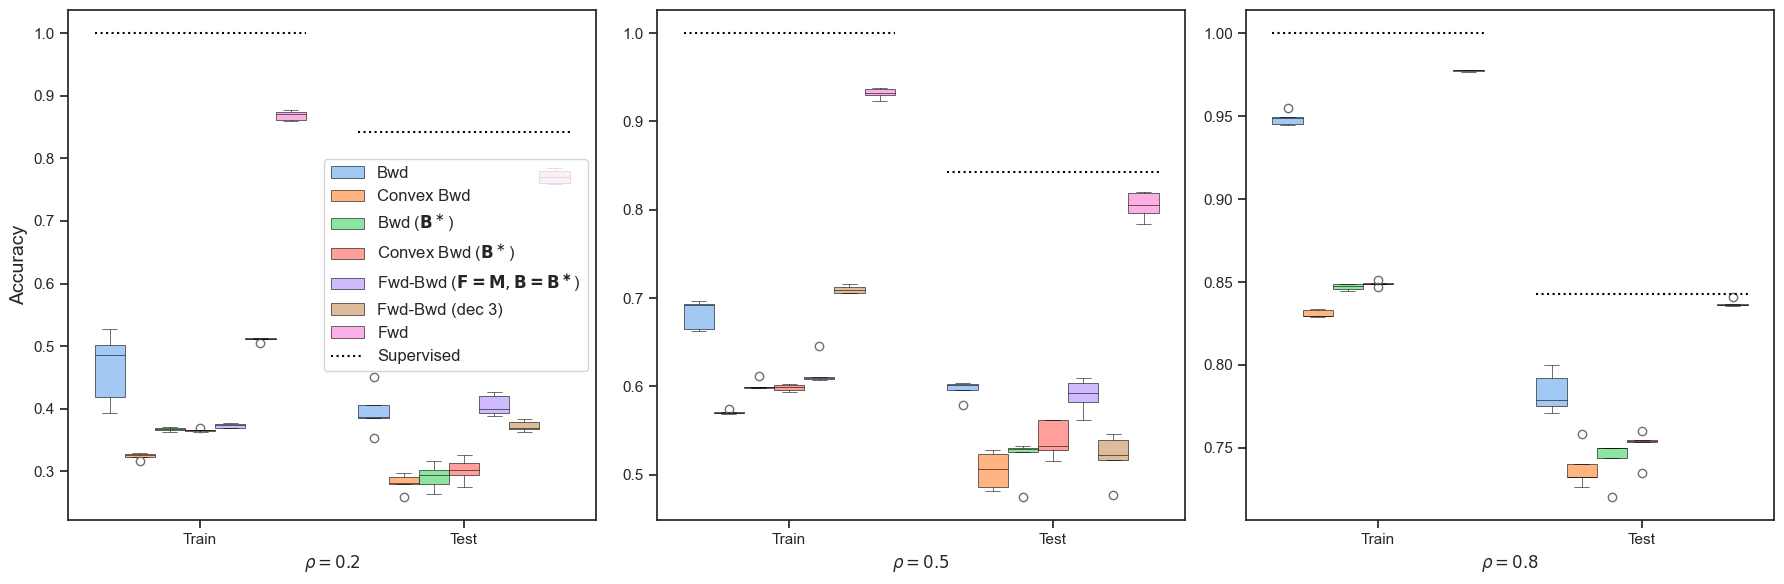

In [24]:
#selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 50]
#last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[(last_epoch_df['corr_p']==0.2)& (last_epoch_df['repetition']<5)]  
df_corr2 = last_epoch_df[(last_epoch_df['corr_p']==0.5)& (last_epoch_df['repetition']<5)]
df_corr3 = last_epoch_df[(last_epoch_df['corr_p']==0.8)& (last_epoch_df['repetition']<5)]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==50) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ].acc.mean()

print(supervised_train, supervised_test)
train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt','FB_decomposed_5','Forward']
new_labels = ['Bwd', 'Convex Bwd ', r'Bwd (${\bf B}^\ast$)', r'Convex Bwd (${\bf B}^\ast$)',  r'Fwd-Bwd (${\bf F=M},{\bf B=B^\ast}$)','Fwd-Bwd (dec 3)','Fwd']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.2$')
axes[0].set_ylabel('Accuracy', fontsize=14)
#axes[0].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)
axes[0].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[0].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)


handles, _ = axes[0].get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
axes[0].legend(all_handles, all_labels, prop={'size': 12})


#handles, labels = axes[0].get_legend_handles_labels()
#axes[0].legend(handles, new_labels,prop={'size': 12})
#print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
axes[1].set_ylabel('')
axes[1].legend().remove()
axes[1].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[1].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
#axes[1].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
axes[2].set_ylabel('')
axes[2].legend().remove()
axes[2].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[2].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
#axes[2].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig13.eps', format='eps',dpi=1000)
#plt.savefig('Fig13.jpeg')

# GMM
## partial 

In [1]:

import os
import glob
import pandas as pd

# 1) Build a glob pattern that matches all FB_decomposed CSVs under Results/gmm_Partial
#    On Windows this will use backslashes automatically via os.path.join.
pattern = os.path.join("Results", "gmm_Partial", "FB_decomposed_p_*_*.csv")

# 2) Iterate over each matching filepath
for filepath in glob.glob(pattern):
    # Extract just the filename (not the full path)
    filename = os.path.basename(filepath)
    
    # 3) Pull out the substring after "p_-" and before the next underscore.
    #    In "FB_decomposed_p_+0.8p_-2.0_4.csv" → split on "p_-" gives ["FB_decomposed_p_+0.8p_", "2.0_4.csv"]
    #    Then split that on "_" to isolate "2.0".
    try:
        raw_val = filename.split("p_-")[1].split("_")[0]  # e.g. "2.0"
    except IndexError:
        # If the filename doesn't match the expected pattern, skip it.
        continue
    
    # 4) Convert "2.0" → float → int → "2"
    val_int = int(float(raw_val))
    
    # 5) Form the new loss_fn string
    new_loss_name = f"FB_decomposed_{val_int}"
    
    # 6) Load the CSV, replace any "FB_decomposed" entries in loss_fn, and write back
    df = pd.read_csv(filepath)
    df.loc[df["loss_fn"] == "FB_decomposed", "loss_fn"] = new_loss_name
    df.to_csv(filepath, index=False)
    
    print(f"Updated {filename}: set loss_fn → {new_loss_name}")

  

Updated FB_decomposed_p_+0.2p_-1.0_0.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-1.0_1.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-1.0_2.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-1.0_3.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-1.0_4.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-1.0_5.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-1.0_6.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-1.0_7.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-1.0_8.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-1.0_9.csv: set loss_fn → FB_decomposed_1
Updated FB_decomposed_p_+0.2p_-2.0_0.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_1.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_2.csv: set loss_fn → FB_decomposed_2
Updated FB_decomposed_p_+0.2p_-2.0_3.csv: set loss_fn → FB_decom

In [9]:
df_list = []
folder_path = 'Results/gmm_Partial'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

df_train = merged_df[['epoch','train_acc','loss_fn','repetition','corr_p']]
df_train['train'] = 'Train'
df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
df_test = merged_df[['epoch','test_acc','loss_fn','repetition','corr_p']]
df_test['train'] = 'Test'
df_test.rename(columns={'test_acc': 'acc'}, inplace=True)
df_concatenado = pd.concat([df_train, df_test], ignore_index=True)
df_concatenado

C:\Users\danib\AppData\Local\Temp\ipykernel_24848\3358743453.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['train'] = 'Train'
C:\Users\danib\AppData\Local\Temp\ipykernel_24848\3358743453.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'train_acc': 'acc'}, inplace=True)
C:\Users\danib\AppData\Local\Temp\ipykernel_24848\3358743453.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,epoch,acc,loss_fn,repetition,corr_p,train
0,1,0.782188,Backward_conv,0,0.2,Train
1,2,0.790938,Backward_conv,0,0.2,Train
2,3,0.791250,Backward_conv,0,0.2,Train
3,4,0.791875,Backward_conv,0,0.2,Train
4,5,0.792813,Backward_conv,0,0.2,Train
...,...,...,...,...,...,...
54195,96,0.890000,Supervised,0,0.2,Test
54196,97,0.890000,Supervised,0,0.2,Test
54197,98,0.890000,Supervised,0,0.2,Test
54198,99,0.890000,Supervised,0,0.2,Test


In [214]:
df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==50) ]


,epoch,acc,loss_fn,repetition,corr_p,train
27549,50,0.88625,Supervised,0,0.2,Test
27599,50,0.88625,Supervised,1,0.2,Test
27649,50,0.88625,Supervised,2,0.2,Test
27699,50,0.88625,Supervised,3,0.2,Test
27749,50,0.88625,Supervised,4,0.2,Test
27799,50,0.88625,Supervised,5,0.2,Test
27849,50,0.88625,Supervised,6,0.2,Test
27899,50,0.88625,Supervised,7,0.2,Test
27949,50,0.88625,Supervised,8,0.2,Test
27999,50,0.88625,Supervised,9,0.2,Test


Not this but the next

0.87375 0.89


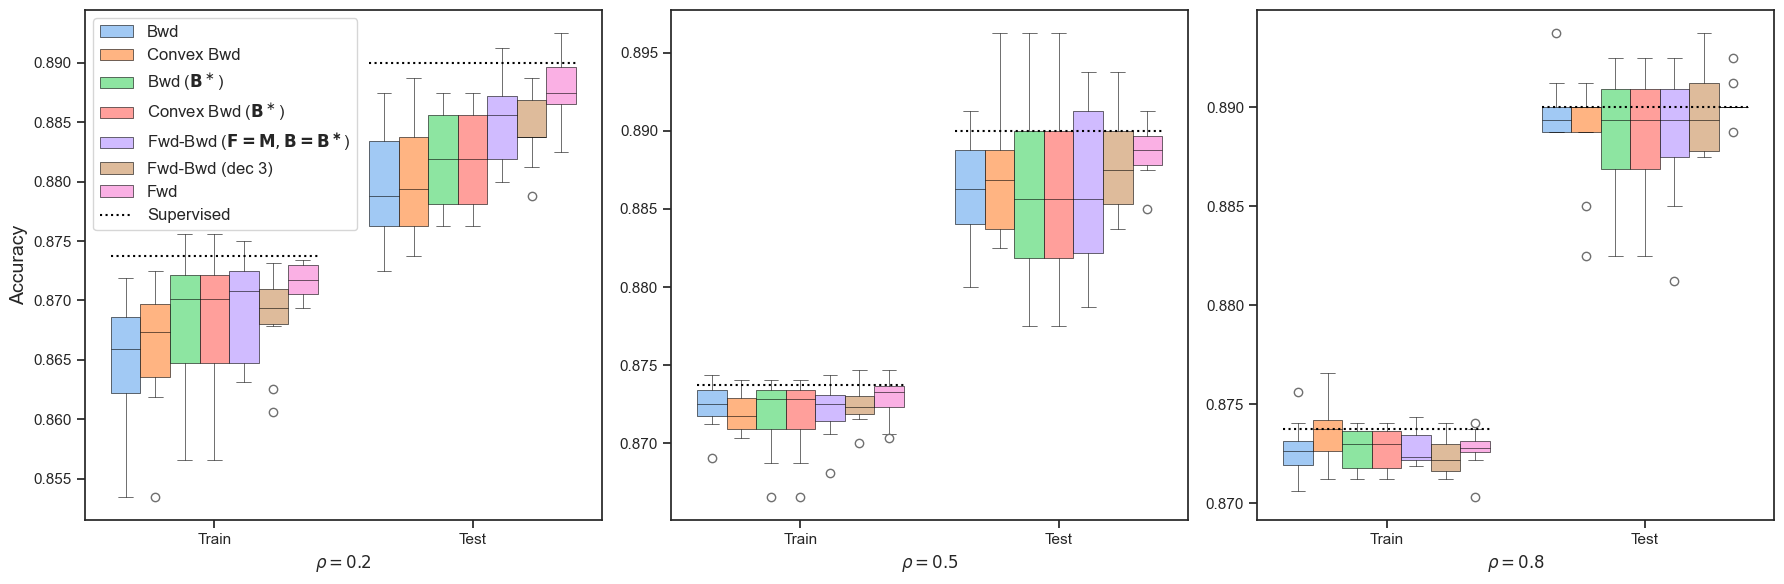

In [11]:
#selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 100]
#last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==100) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==100) ].acc.mean()

print(supervised_train, supervised_test)
train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


hue_order = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt','FB_decomposed_3','Forward']
new_labels = ['Bwd', 'Convex Bwd ', r'Bwd (${\bf B}^\ast$)', r'Convex Bwd (${\bf B}^\ast$)',  r'Fwd-Bwd (${\bf F=M},{\bf B=B^\ast}$)','Fwd-Bwd (dec 3)','Fwd']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.2$')
axes[0].set_ylabel('Accuracy', fontsize=14)
#axes[0].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)
axes[0].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[0].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)


handles, _ = axes[0].get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
axes[0].legend(all_handles, all_labels, prop={'size': 12})


#handles, labels = axes[0].get_legend_handles_labels()
#axes[0].legend(handles, new_labels,prop={'size': 12})
#print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
axes[1].set_ylabel('')
axes[1].legend().remove()
axes[1].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[1].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
#axes[1].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

sns.boxplot(data=df_corr3, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[2], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[2].set_xlabel(r'$\rho=0.8$')
axes[2].set_ylabel('')
axes[2].legend().remove()
axes[2].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[2].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
#axes[2].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig13.eps', format='eps',dpi=1000)
#plt.savefig('Fig13.jpeg')

0.87375 0.89


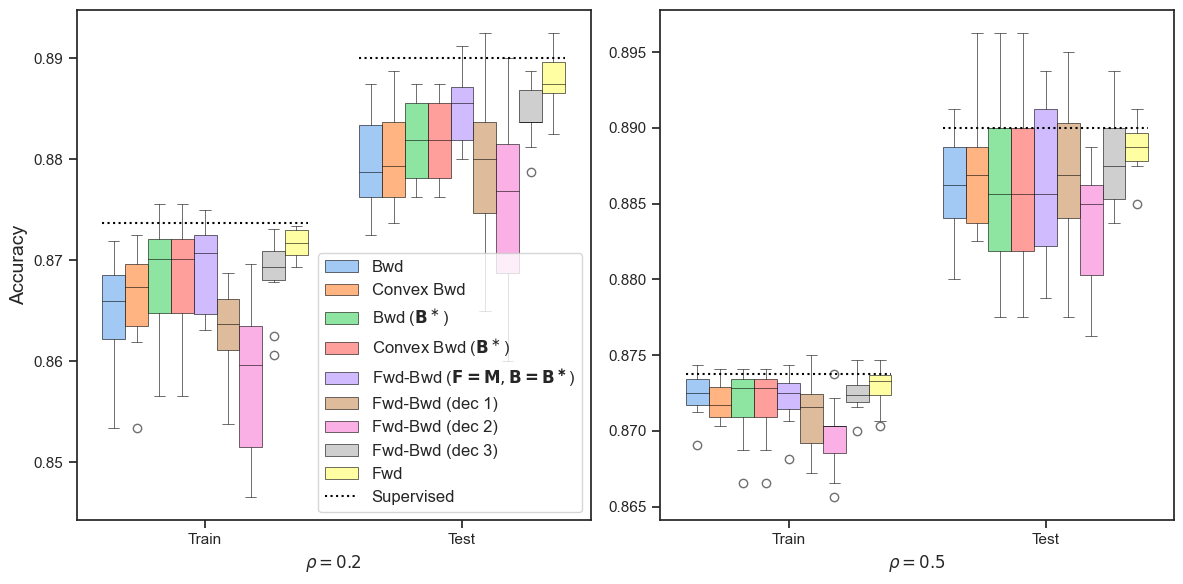

In [12]:
#selected_loss_fns = ['Backward', 'Forward']
last_epoch_df = df_concatenado[df_concatenado['epoch'] == 100]
#last_epoch_df = last_epoch_df[last_epoch_df['loss_fn'].isin(selected_loss_fns)]

df_corr1 = last_epoch_df[last_epoch_df['corr_p']==0.2]
df_corr2 = last_epoch_df[last_epoch_df['corr_p']==0.5]
df_corr3 = last_epoch_df[last_epoch_df['corr_p']==0.8]

supervised_train = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Train') & (df_concatenado['epoch']==100) ].acc.mean()
supervised_test = df_concatenado[(df_concatenado['corr_p']==0.2) & (df_concatenado['loss_fn']=='Supervised') & (df_concatenado['train']=='Test') & (df_concatenado['epoch']==100) ].acc.mean()

print(supervised_train, supervised_test)
train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95


# --- Define style for the supervised line ---
line_color = 'black'
line_style = ':'
line_width = 1.5


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)


hue_order = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt','FB_decomposed_1','FB_decomposed_2','FB_decomposed_3','Forward']
new_labels = ['Bwd', 'Convex Bwd ', r'Bwd (${\bf B}^\ast$)', r'Convex Bwd (${\bf B}^\ast$)',  r'Fwd-Bwd (${\bf F=M},{\bf B=B^\ast}$)','Fwd-Bwd (dec 1)','Fwd-Bwd (dec 2)','Fwd-Bwd (dec 3)','Fwd']


sns.boxplot(data=df_corr1, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[0], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[0].set_xlabel(r'$\rho=0.2$')
axes[0].set_ylabel('Accuracy', fontsize=14)
#axes[0].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)
axes[0].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[0].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)


handles, _ = axes[0].get_legend_handles_labels() 
supervised_handle = Line2D(
    [0], [0],
    color=line_color,
    linestyle=line_style,
    linewidth=line_width,
    label='Supervised'
)
all_handles = handles[:len(new_labels)] + [supervised_handle]
all_labels = new_labels + ['Supervised']
axes[0].legend(all_handles, all_labels, prop={'size': 12})


#handles, labels = axes[0].get_legend_handles_labels()
#axes[0].legend(handles, new_labels,prop={'size': 12})
#print(labels)
 

sns.boxplot(data=df_corr2, x='train', y='acc', hue='loss_fn', hue_order= hue_order, ax=axes[1], saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      
            whiskerprops=dict(color='black', linewidth=0.4),      
            capprops=dict(color='black', linewidth=0.4),          
            medianprops=dict(color='black', linewidth=0.4))
axes[1].set_xlabel(r'$\rho=0.5$')
axes[1].set_ylabel('')
axes[1].legend().remove()
axes[1].axhline(y=supervised_train, color=line_color, linestyle=line_style, linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
axes[1].axhline(y=supervised_test, color=line_color, linestyle=line_style, linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
#axes[1].axvline(x=0.5, color='gray', linestyle='--', linewidth=0.1)

# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig13.eps', format='eps',dpi=1000)
#plt.savefig('Fig13.jpeg')

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder = "Results/gmm_Partial"
corr = [0.2,0.5,0.8] 
soft = torch.nn.Softmax(dim=1)

losses = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt','FB_decomposed_1','FB_decomposed_2','FB_decomposed_3','Forward']
results = []
for cor in corr:
    for los in losses:
        for rep in range(10):
            corp = 'None'
            if los == 'FB_decomposed_1':
                corp = '1.0'
                losd = 'FB_decomposed'
            elif los == 'FB_decomposed_2':
                corp = '2.0'
                losd = 'FB_decomposed'
            elif los == 'FB_decomposed_3':
                corp = '3.0'
                losd = 'FB_decomposed'
            else:
                losd = los
            model_file = folder + f"/{losd}_p_+{cor}p_-{corp}_{rep}.pkl"
            with open(model_file, "rb") as f:
                model = pickle.load(f)
                f.close()
            model = model['overall_models']

            if los == 'FB_decomposed_1':
                data_folder = f"Datasets/weak_datasets/gmm_Partial_p_+{cor}p_-1.0"
            elif los == 'FB_decomposed_2':
                data_folder = f"Datasets/weak_datasets/gmm_Partial_p_+{cor}p_-2.0"
            elif los == 'FB_decomposed_3':
                data_folder = f"Datasets/weak_datasets/gmm_Partial_p_+{cor}p_-3.0"
            else:
                data_folder = f"Datasets/weak_datasets/gmm_Partial_p{cor}"
            data_file = data_folder +  f"/Dataset_{rep}.pkl"
            f = open(data_file,"rb")
            Data,Weak = pickle.load(f)
            data = Data.test_dataset.data.to(device)

            
            yhat = soft(model(data)).cpu().detach().numpy()
            POS = np.array([list(gmm_posterior(data[i,:].cpu().detach().numpy())) for i in range(data.shape[0])])
            AB = POS-yhat
            norms = np.diag(AB@AB.T)

            mean_norm = np.mean(norms)
            std_norm = np.std(norms)
            
            # Store values in the results list
            results.append({
                'Corruption':cor,
                "Loss Function": los,
                "Repetition": rep,
                "Mean norm": mean_norm,
                "Std norm": std_norm
            })
df_results = pd.DataFrame(results)
df_results

,Corruption,Loss Function,Repetition,Mean norm,Std norm
0,0.2,Backward,0,0.013985,0.063116
1,0.2,Backward,1,0.028683,0.076512
2,0.2,Backward,2,0.022589,0.069253
3,0.2,Backward,3,0.022173,0.073235
4,0.2,Backward,4,0.027643,0.101234
...,...,...,...,...,...
265,0.8,Forward,5,0.009019,0.052985
266,0.8,Forward,6,0.009203,0.053957
267,0.8,Forward,7,0.008423,0.055799
268,0.8,Forward,8,0.009223,0.051846


In [12]:
df_results = df_results[df_results['Corruption'] < 0.8]


['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt', 'FB_decomposed_1', 'FB_decomposed_2', 'FB_decomposed_3', 'Forward']


C:\Users\danib\AppData\Local\Temp\ipykernel_24848\368217001.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['0.2','0.5','0.8'])
C:\Users\danib\AppData\Local\Temp\ipykernel_24848\368217001.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['0.2','0.5','0.8'])


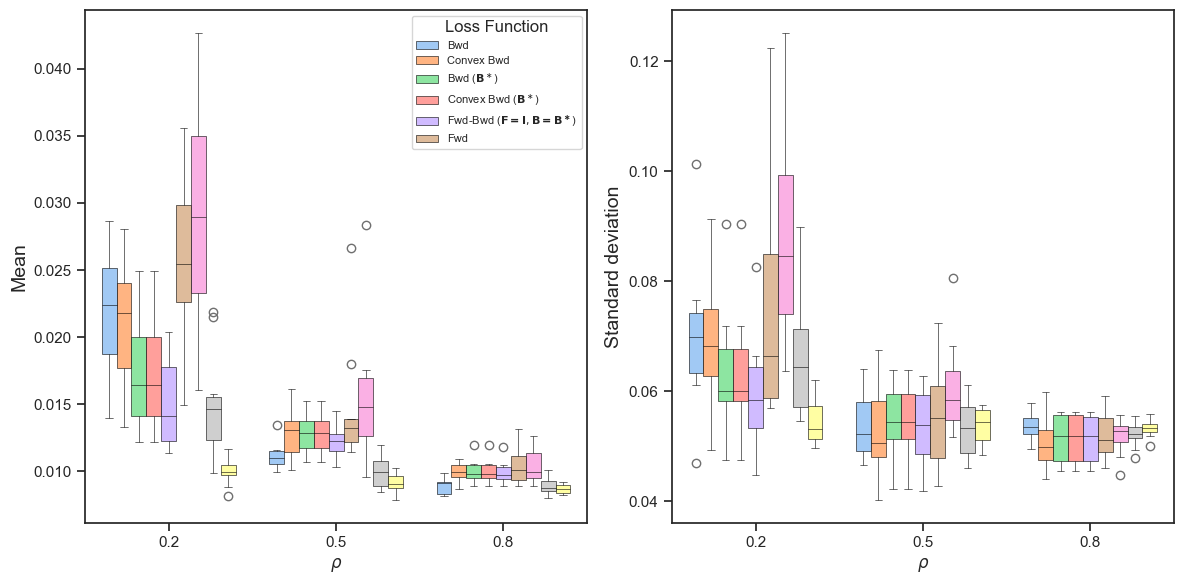

In [14]:
#selected_loss_fns = ['Backward', 'FB_decomposed', 'Forward']
selected_loss_fns = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt','FB_decomposed_1','FB_decomposed_2','FB_decomposed_3','Forward']
#selected_loss_fns = ['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv','Forward', 'Forward_opt', ]
df_results = df_results[df_results['Loss Function'].isin(selected_loss_fns)]


sns.set_theme(style="ticks", palette="pastel")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Boxplot for train_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Mean norm',hue='Loss Function', ax=axes[0],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      # Box border
            whiskerprops=dict(color='black', linewidth=0.4),      # Whisker lines
            capprops=dict(color='black', linewidth=0.4),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.4))
#axes[0].set_title('Mean')
axes[0].set_ylabel('Mean', fontsize=14)

axes[0].set_xticklabels(['0.2','0.5','0.8'])
axes[0].set_xlabel(r'$\rho$')
# Get the handles and labels from the current legend
handles, labels = axes[0].get_legend_handles_labels()
print(labels)
# Set the new legend labels
#new_labels = [r'Convex Backward',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward']  
#axes[0].legend(handles, new_labels, title='Loss Function')
#axes[0].legend(title='Loss', loc='lower left', labels=[r'Backward (${\bf B}^\ast$)',r'Backward',r'Forward (${\bf B}^\ast$)',r'Forward'])
#['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward', 'Forward_opt']

new_labels = ['Bwd', 'Convex Bwd ', r'Bwd (${\bf B}^\ast$)', r'Convex Bwd (${\bf B}^\ast$)',  r'Fwd-Bwd (${\bf F=I},{\bf B=B^\ast}$)','Fwd']
axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 8})


#new_labels = ['Bwd', 'Fwd-Bwd','Fwd']
#axes[0].legend(handles, new_labels, title='Loss Function',prop={'size': 10})

# Boxplot for test_acc
sns.boxplot(data=df_results,x = 'Corruption', y='Std norm',hue='Loss Function', ax=axes[1],saturation=1,
            boxprops=dict(edgecolor='black', linewidth=0.4),      # Box border
            whiskerprops=dict(color='black', linewidth=0.4),      # Whisker lines
            capprops=dict(color='black', linewidth=0.4),          # Caps at ends of whiskers
            medianprops=dict(color='black', linewidth=0.4))
#axes[1].set_title('Standard deviation')
#axes[1].set_xlabel(r'$\rho=(\rho_{-1},\rho_{+1})$')
axes[1].set_ylabel('Standard deviation', fontsize=14)
#axes[0].set_ylabel('Train Accuracy')
#axes[1].set_xticklabels(['(0.2,0.2)','(0.3,0.1)','(0.4,0.4)'])
axes[1].set_xticklabels(['0.2','0.5','0.8'])
axes[1].set_xlabel(r'$\rho$')
axes[1].legend().remove()


# Adjust layout
plt.tight_layout()
plt.show()
#plt.savefig('Fig7.eps', format='eps',dpi=1000)
#plt.savefig('Fig7.jpeg')['Backward', 'Backward_conv', 'Backward_opt', 'Backward_opt_conv', 'Forward_opt','FB_decomposed_1','FB_decomposed_2','FB_decomposed_3','Forward']
